In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

df = pd.read_csv("penguins.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


culmen_length_mm: Chiều dài của mỏ (culmen) tính bằng milimet. Culmen là phần trên của mỏ.

culmen_depth_mm: Độ sâu (hoặc chiều cao) của mỏ tính bằng milimet.

flipper_length_mm: Chiều dài của vây chèo (flipper) tính bằng milimet.

body_mass_g: Khối lượng cơ thể tính bằng gram.

## Tiền xử lý dữ liệu

In [2]:
# Xử lý giá trị của cột 'sex'
print(df['sex'].unique())

['MALE' 'FEMALE' nan '.']


In [3]:
df['sex'] = df['sex'].replace('.', np.nan)
# Xóa các dòng chứa giá trị NA
df.dropna(inplace=True)
df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [4]:
# Mã hóa cột 'sex' thành dạng số Male: 1, Female: 0
df['sex'] = df['sex'].map({'MALE': 1, "FEMALE": 0})

# Ép kiểu cột 'sex' thành chuỗi để là biến phân loại rời rạc
df['sex'] = df['sex'].astype(str)
df.head()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g sex
0              39.1             18.7              181.0       3750.0   1
1              39.5             17.4              186.0       3800.0   0
2              40.3             18.0              195.0       3250.0   0
4              36.7             19.3              193.0       3450.0   0
5              39.3             20.6              190.0       3650.0   1

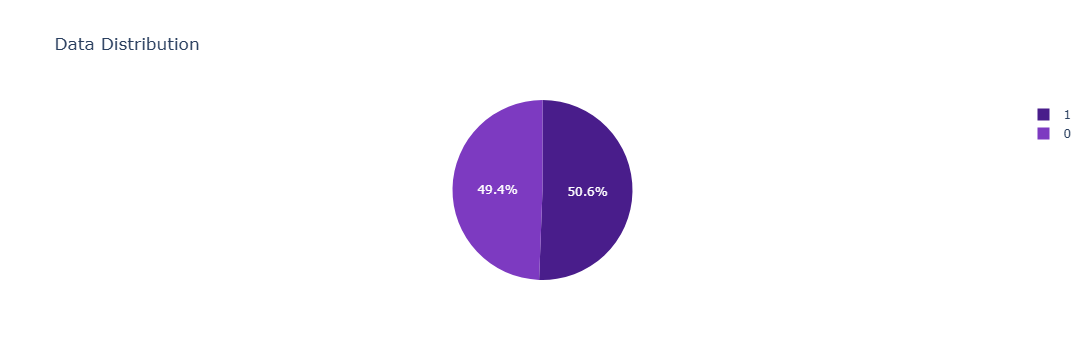

In [5]:
# Sự khác biệt giữa hai nhóm chỉ là 50.6% - 49.4% = 1.2%. Đây là một sự chênh lệch rất nhỏ và thường được coi là không đáng kể
fig = px.pie(df,'sex',color_discrete_sequence=['#491D8B','#7D3AC1','#EB548C'],title='Data Distribution',template='plotly')
fig.show()

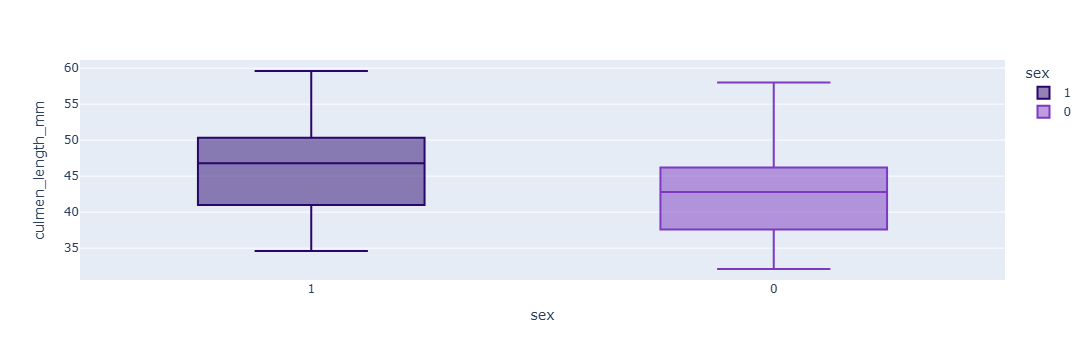

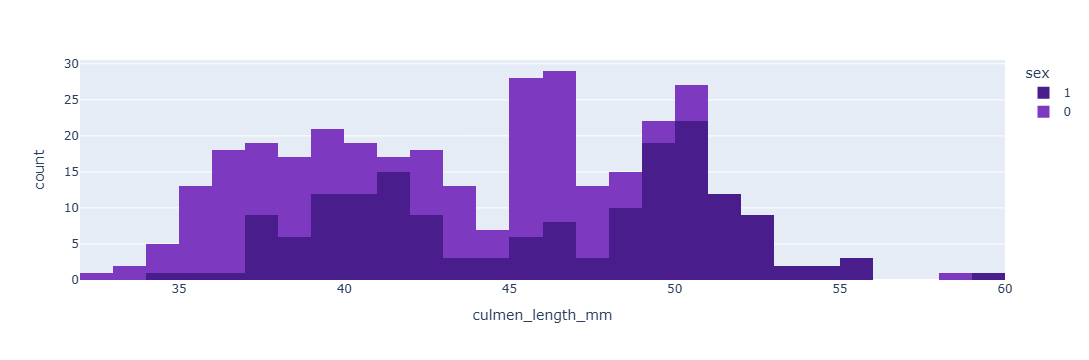

In [6]:
# Phân tích biến culmen_length_mm với box-plot
fig = px.box(data_frame=df, x='sex',y='culmen_length_mm',color='sex',color_discrete_sequence=['#29066B','#7D3AC1','#EB548C'],orientation='v')
fig.show()

# Phân tích biến culmen_length_mm với histogram
fig = px.histogram(data_frame=df, x='culmen_length_mm',color='sex',color_discrete_sequence=['#491D8B','#7D3AC1','#EB548C'],nbins=50)
fig.show()

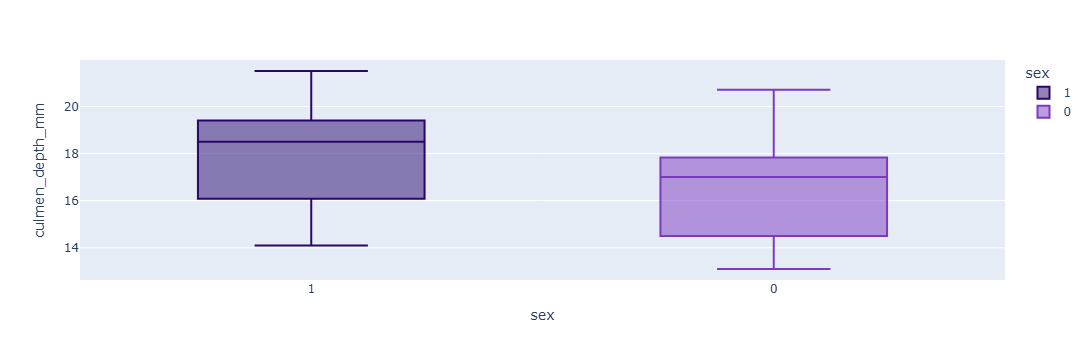

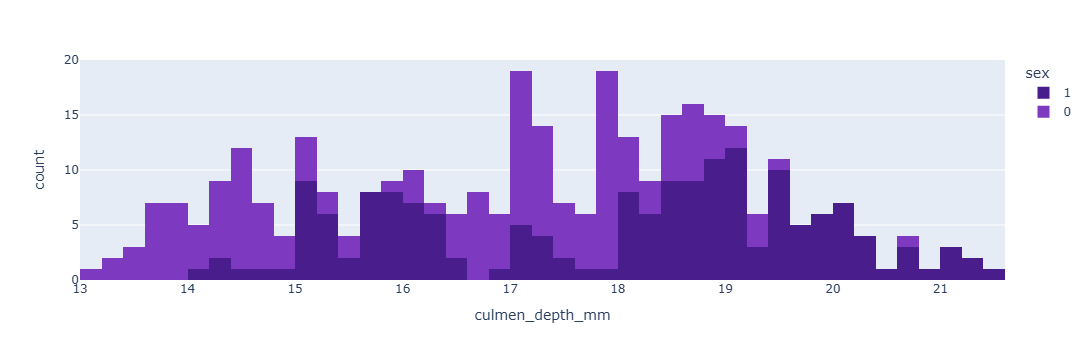

In [7]:
# Phân tích biến culmen_depth_mm với box-plot
fig = px.box(data_frame=df, x='sex',y='culmen_depth_mm',color='sex',color_discrete_sequence=['#29066B','#7D3AC1','#EB548C'],orientation='v')
fig.show()

# Phân tích biến culmen_depth_mm với histogram
fig = px.histogram(data_frame=df, x='culmen_depth_mm',color='sex',color_discrete_sequence=['#491D8B','#7D3AC1','#EB548C'],nbins=50)
fig.show()

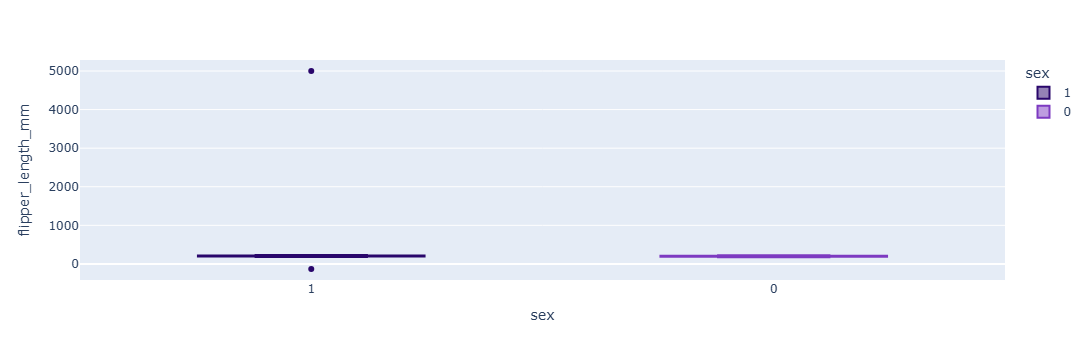

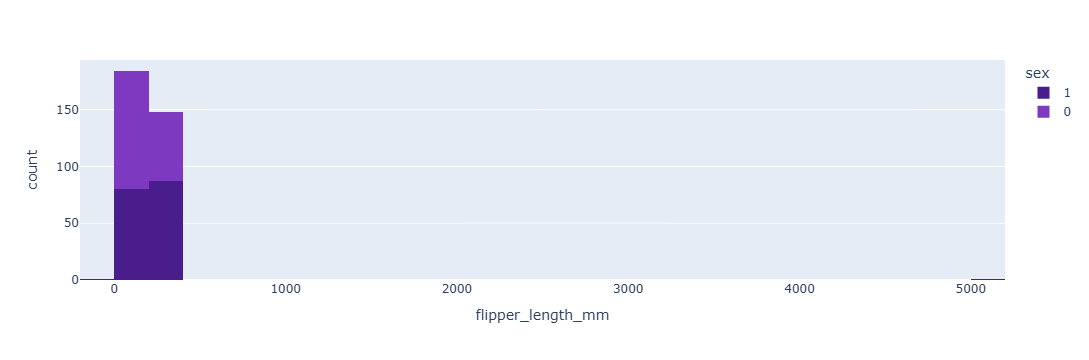

In [8]:
# Phân tích biến flipper_length_mm với box-plot
fig = px.box(data_frame=df, x='sex',y='flipper_length_mm',color='sex',color_discrete_sequence=['#29066B','#7D3AC1','#EB548C'],orientation='v')
fig.show()

# Phân tích biến flipper_length_mm với histogram
fig = px.histogram(data_frame=df, x='flipper_length_mm',color='sex',color_discrete_sequence=['#491D8B','#7D3AC1','#EB548C'],nbins=50)
fig.show()

Cả hai nhóm sex=0 và sex=1 đều có giá trị flipper_length_mm trong khoảng từ 0mm - 400mm (đây là phạm vi chiều dài vây chèo bình thường của chim cánh cụt).  

Giá trị Ngoại lệ Cực lớn (Outliers):
- Có một điểm dữ liệu cực lớn, gần 5000 mm, xuất hiện trong nhóm sex=1.
- Có một điểm dữ liệu thứ hai, gần 0 mm, xuất hiện trong nhóm sex=1.

In [9]:
# Xử lý ngoại lệ cột flipper_length_mm
# Chiều dài vây chèo (flipper_length_mm) của chim cánh cụt trưởng thành thay đổi tùy theo loài, nhưng nhìn chung nằm trong phạm vi từ khoảng 170 mm đến 230 mm.
LOWER_BOUND = 100  # Loại bỏ giá trị cực nhỏ 
UPPER_BOUND = 300  # Loại bỏ giá trị cực lớn 
condition = (df['flipper_length_mm'] >= LOWER_BOUND) & \
            (df['flipper_length_mm'] <= UPPER_BOUND)

df = df[condition]
print(f"Min: {df['flipper_length_mm'].min()}")
print(f"Max: {df['flipper_length_mm'].max()}")

Min: 172.0
Max: 231.0


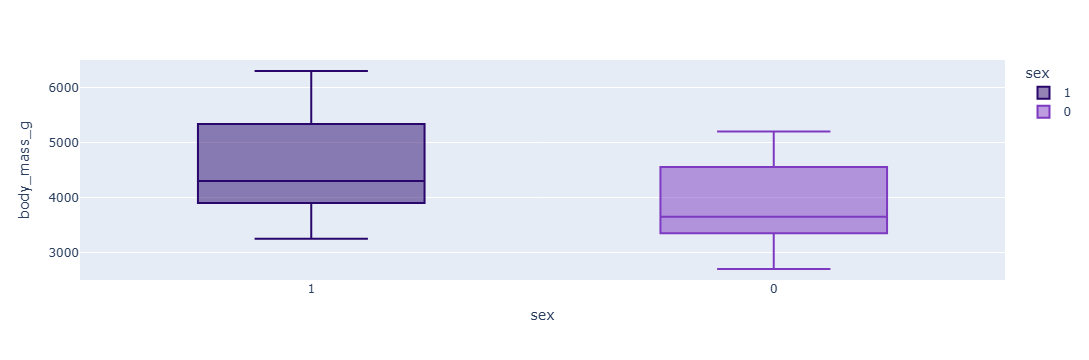

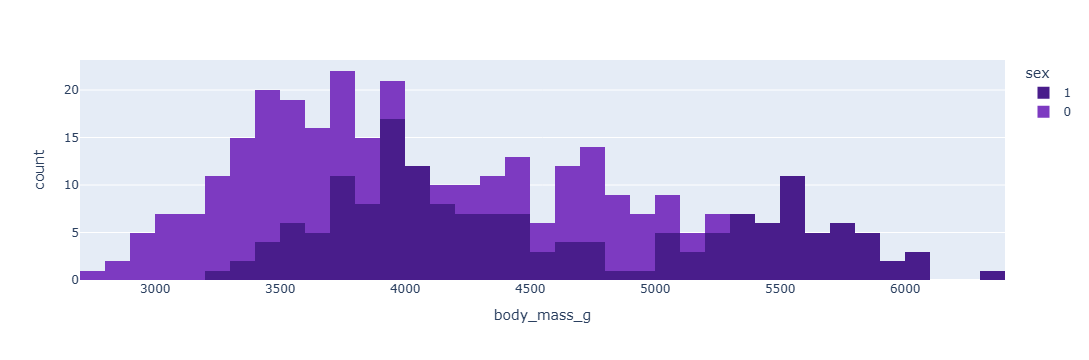

In [10]:
# Phân tích biến body_mass_g với box-plot
fig = px.box(data_frame=df, x='sex',y='body_mass_g',color='sex',color_discrete_sequence=['#29066B','#7D3AC1','#EB548C'],orientation='v')
fig.show()

# Phân tích biến body_mass_g với histogram
fig = px.histogram(data_frame=df, x='body_mass_g',color='sex',color_discrete_sequence=['#491D8B','#7D3AC1','#EB548C'],nbins=50)
fig.show()

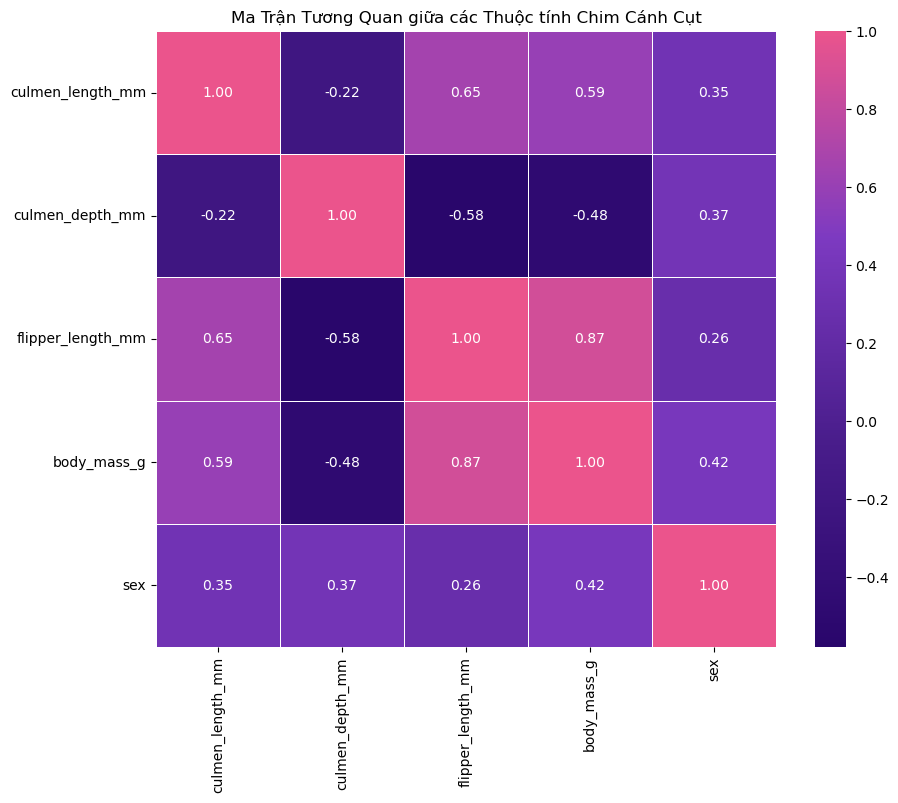

In [11]:
# Ma trận tương quan (Heatmap)
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
plt.figure(figsize=(10, 8))
custom_colors = ['#29066B', '#491D8B', '#7D3AC1', '#EB548C'] 
custom_cmap = LinearSegmentedColormap.from_list("custom_heatmap", custom_colors, N=256)

sns.heatmap(
    df.corr(), 
    annot=True,              
    cmap=custom_cmap,         
    fmt=".2f",               
    linewidths=.5,           
    cbar=True                
)

plt.title('Ma Trận Tương Quan giữa các Thuộc tính Chim Cánh Cụt')
plt.show()

Các cặp tương quan cao:
- body_mass_g và flipper_length_mm: 0.87
- flipper_length_mm và culmen_length_mm: 0.65

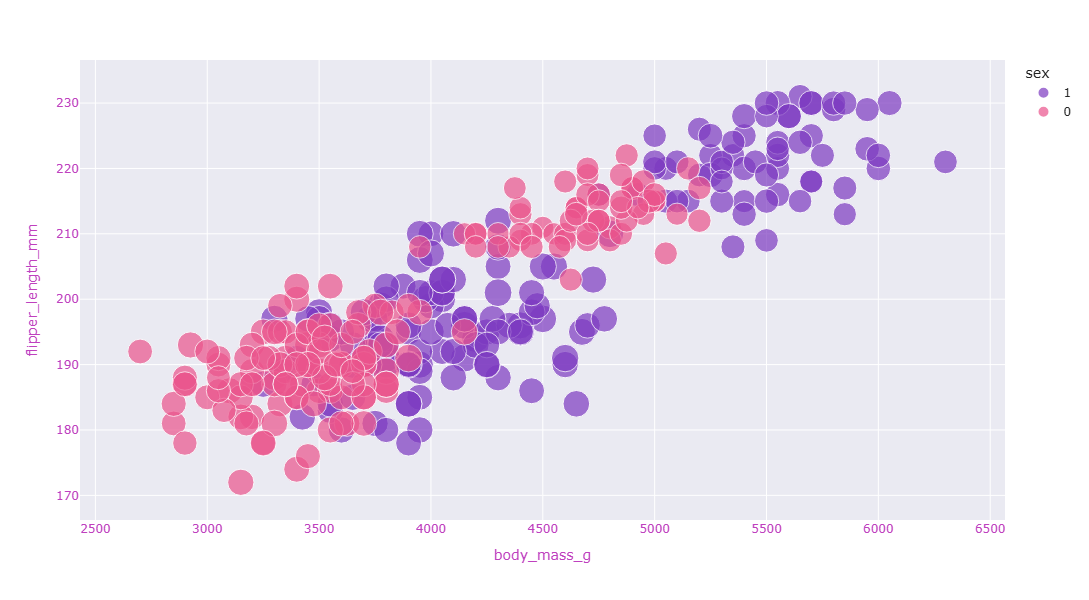

In [12]:
# Phân tích 2 biến body_mass_g và flipper_length_mm
fig = px.scatter(data_frame=df, x='body_mass_g',y='flipper_length_mm',color='sex',size='culmen_depth_mm',template='seaborn',color_discrete_sequence=['#7D3AC1','#EB548C'],)
fig.update_layout(width=800, height=600,xaxis=dict(color="#BF40BF"),yaxis=dict(color="#BF40BF"))
fig.show()

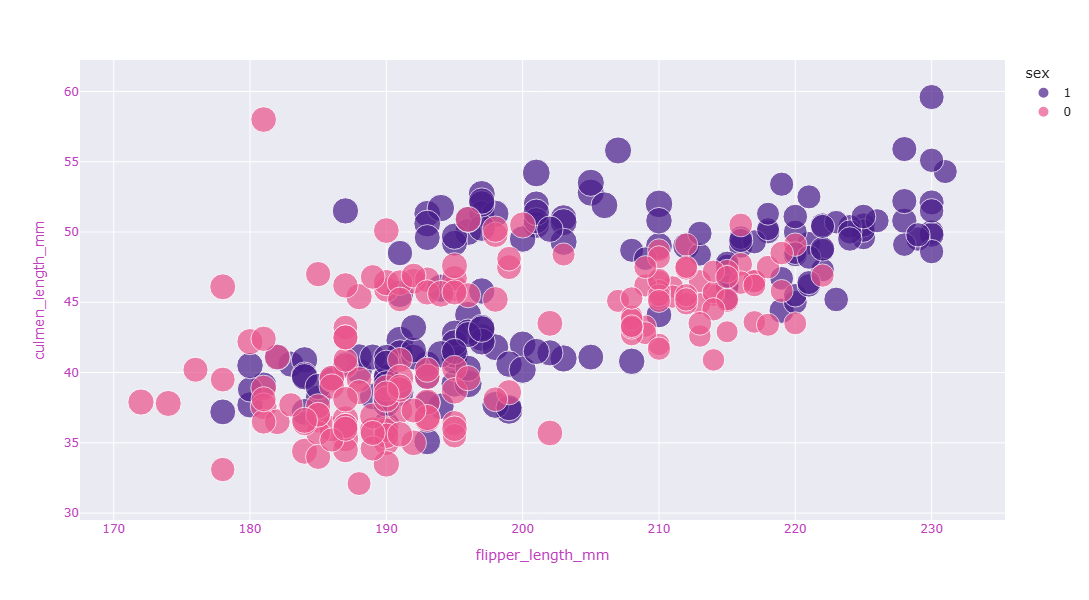

In [13]:
# Phân tích 2 biến flipper_length_mm và culmen_length_mm
fig = px.scatter(data_frame=df, x='flipper_length_mm',y='culmen_length_mm',color='sex',size='culmen_depth_mm',template='seaborn',color_discrete_sequence=['#491D8B','#EB548C'],)
fig.update_layout(width=800, height=600,xaxis=dict(color="#BF40BF"),yaxis=dict(color="#BF40BF"))
fig.show()

## Phân cụm K-Means

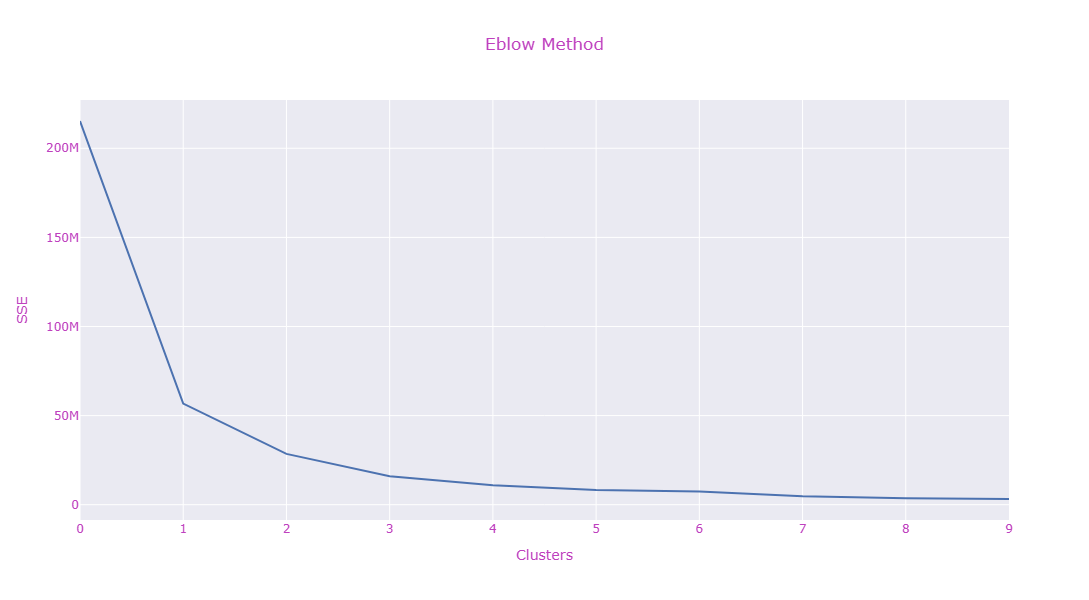

In [14]:
X = df.iloc[:,:-1].values # Tất cả các cột trừ cột cuối cùng (cột target)
y = df.iloc[:,-1].values # Chỉ lấy cột cuối cùng (cột target)
sse = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i , max_iter=300)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
fig = px.line(y=sse,template="seaborn",title='Eblow Method')
fig.update_layout(width=800, height=600,
title_font_color="#BF40BF",
xaxis=dict(color="#BF40BF",title="Clusters"),
yaxis=dict(color="#BF40BF",title="SSE"))

Đường cong giảm rất mạnh từ $K=0$ đến $K=1$, và tiếp tục giảm đáng kể từ K=1 đến K=2.  
Tại điểm K=3, đường cong bắt đầu uốn cong và gần như đi vào trạng thái bão hòa, với tốc độ giảm của SSE giảm đi rất nhiều so với trước đó.

In [15]:
kmeans = KMeans(n_clusters = 3,init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
clusters = kmeans.fit_predict(X)

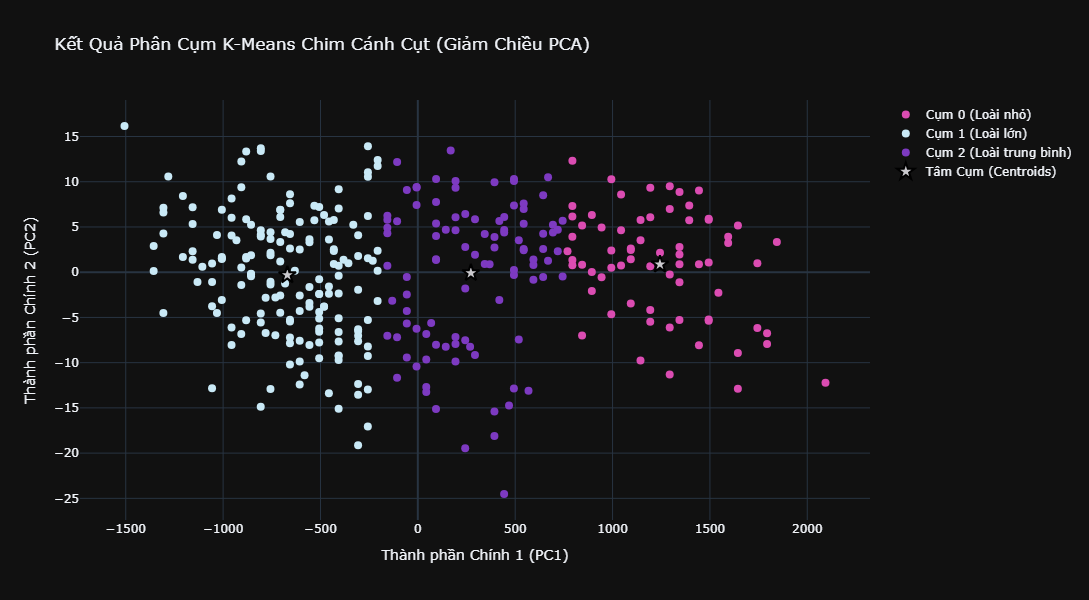

In [16]:
import plotly.graph_objects as go
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

centroids_reduced = pca.transform(kmeans.cluster_centers_)

fig = go.Figure()

cluster_info = [
    {'cluster_id': 0, 'color': '#DB4CB2', 'name': 'Cụm 0 (Loài nhỏ)'},
    {'cluster_id': 1, 'color': '#c9e9f6', 'name': 'Cụm 1 (Loài lớn)'},
    {'cluster_id': 2, 'color': '#7D3AC1', 'name': 'Cụm 2 (Loài trung bình)'}
]

for info in cluster_info:
    c_id = info['cluster_id']
    c_name = info['name']
    c_color = info['color']

    fig.add_trace(go.Scatter(
        x=principal_components[clusters == c_id, 0], 
        y=principal_components[clusters == c_id, 1],
        mode='markers',
        marker=dict(color=c_color, size=8),
        name=c_name
    ))

fig.add_trace(go.Scatter(
    x=centroids_reduced[:, 0], 
    y=centroids_reduced[:, 1],
    mode='markers',
    marker=dict(color='#CAC9CD', symbol='star', size=13, line=dict(width=2, color='black')),
    name='Tâm Cụm (Centroids)'
))

fig.update_layout(
    template='plotly_dark',
    width=1000,
    height=600,
    title='Kết Quả Phân Cụm K-Means Chim Cánh Cụt (Giảm Chiều PCA)',
    xaxis_title='Thành phần Chính 1 (PC1)',
    yaxis_title='Thành phần Chính 2 (PC2)'
)
fig.show()